# I. Numpy

### Импортируйте NumPy

In [74]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [75]:
# df = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
# print(df)
# df = df.reshape(1, df.size)
# print(df)

df = np.zeros(10, dtype=int)
df[4] = 1
df = df.reshape(1, df.size)
df

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [76]:
df = np.arange(10, 50)
df = np.flip(df)
# df = [i for i in df if i % 2 == 0]
df = df[df % 2 == 0]
df

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [77]:
df = np.arange(0, 9).reshape(3, 3)
df

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [78]:
df = np.random.randint(10, size=(4, 3, 2))
f"max: {np.max(df)}, min: {np.min(df)}"

'max: 9, min: 0'

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [79]:
df1 = np.random.randint(10, size=(6, 4))
df2 = np.random.randint(10, size=(4, 3))
df3 = np.dot(df1, df2)
df3

array([[ 33,  41,  81],
       [ 80,  83, 149],
       [ 52,  52, 156],
       [ 84,  75, 177],
       [ 30,  32,  68],
       [ 84,  83, 153]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [80]:
df = np.random.randint(10, size=(7, 7))
df
res = (df - df.std()) / df.mean()
res

array([[ 0.42009115, -0.15637944,  0.42009115,  0.42009115, -0.54069316,
         1.1887186 , -0.54069316],
       [ 0.61224801,  0.42009115,  0.61224801,  0.03577743,  0.42009115,
         0.03577743,  0.80440488],
       [ 0.03577743,  0.80440488, -0.3485363 ,  0.22793429,  0.99656174,
         0.42009115,  1.1887186 ],
       [ 1.1887186 , -0.3485363 ,  0.99656174,  0.99656174,  0.80440488,
         0.99656174,  1.1887186 ],
       [ 0.42009115,  0.22793429, -0.54069316, -0.3485363 ,  0.80440488,
         0.61224801,  0.42009115],
       [ 0.03577743,  1.1887186 , -0.15637944,  0.61224801, -0.54069316,
         1.1887186 ,  0.03577743],
       [ 0.03577743,  0.61224801,  1.1887186 ,  0.80440488,  1.1887186 ,
         0.42009115,  0.99656174]])

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузите датасет Tips из набора датасетов seaborn

In [82]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

### Посмотрите на первые 5 строчек

In [83]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [84]:
df.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [85]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [86]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [87]:
#df.iloc[:, [0, 1, -1]]
df[["total_bill", "tip", "size"]]

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


### Найдите максимальное значение 'total_bill'

In [88]:
df["total_bill"].max()

50.81

### Найдите количество курящих людей

In [89]:
total_smoker = len(df[df["smoker"] == "Yes"])
total_smoker

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [90]:
daily_average = df.groupby("day")["total_bill"].mean()
daily_average

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [91]:
greater_than_median = df.loc[df["total_bill"] > df["total_bill"].median()]
mean_greater_than_median = greater_than_median.groupby("sex")["tip"].mean()

In [92]:
greater_than_median

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [93]:
mean_greater_than_median

sex
Female    3.663939
Male      3.756404
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [94]:
df.replace({"smoker": {"Yes": 1, "No": 0}})

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<Axes: xlabel='total_bill', ylabel='Count'>

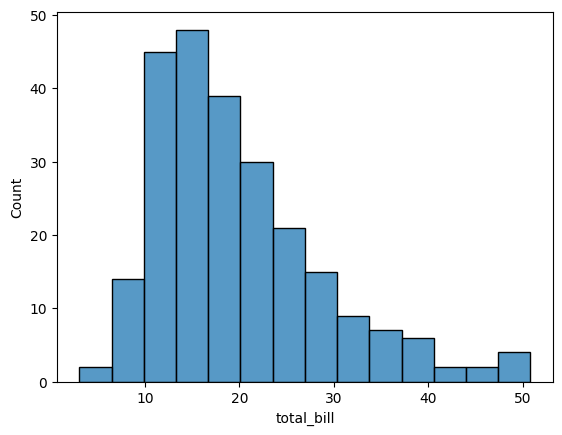

In [95]:
sns.histplot(df["total_bill"])

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<Axes: xlabel='total_bill', ylabel='tip'>

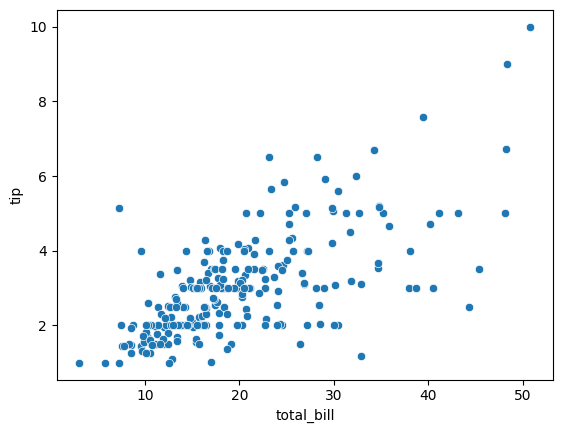

In [96]:
sns.scatterplot(data=df, x="total_bill", y="tip")

### Постройте pairplot

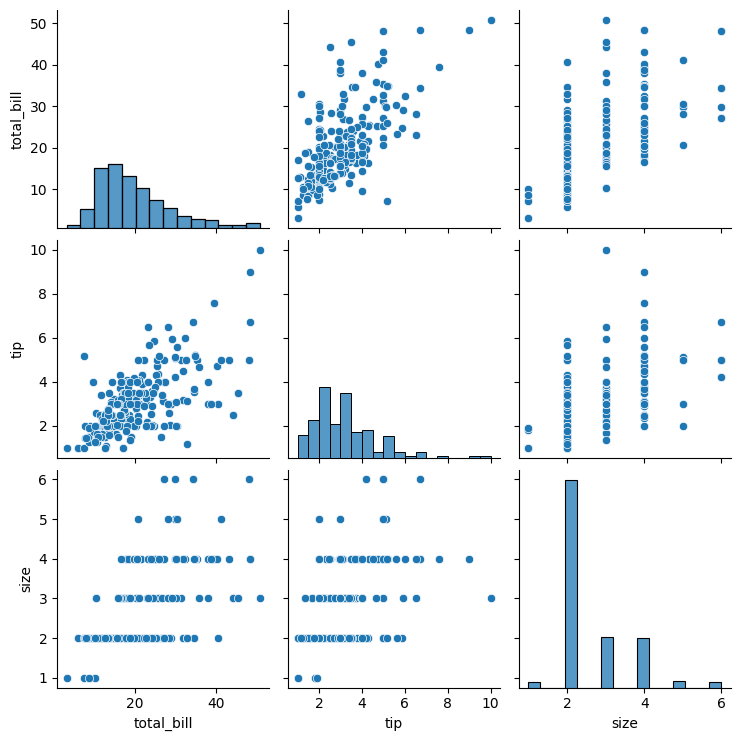

In [97]:
sns.pairplot(df)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

<Axes: xlabel='total_bill', ylabel='day'>

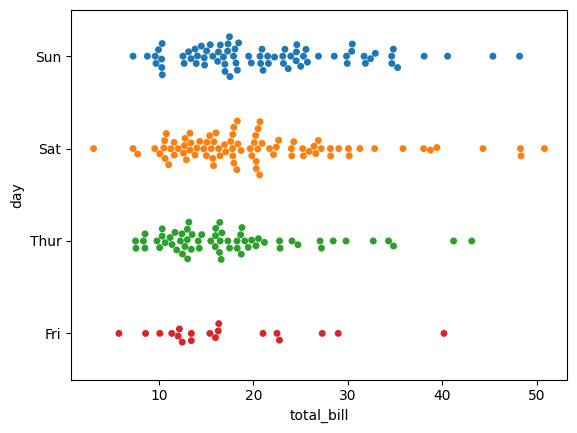

In [98]:
sns.swarmplot(data=df, x="total_bill", y="day", hue="day")

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

<Axes: xlabel='tip', ylabel='Count'>

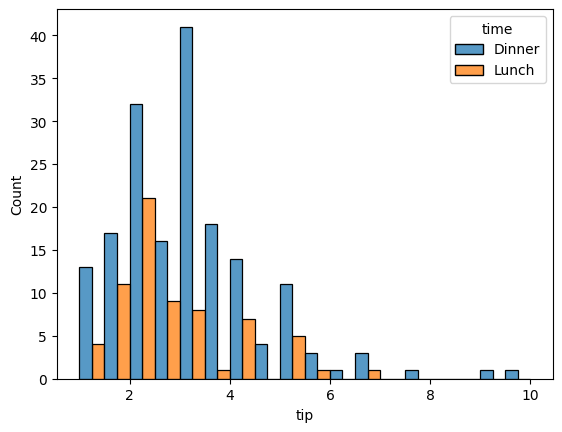

In [99]:
sns.histplot(data=df, x="tip", hue="time", multiple="dodge")

<Axes: xlabel='tip', ylabel='Count'>

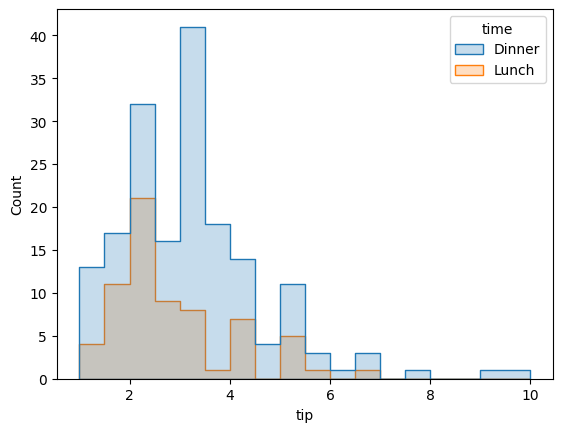

In [100]:
sns.histplot(data=df, x="tip", hue="time", element="step")

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

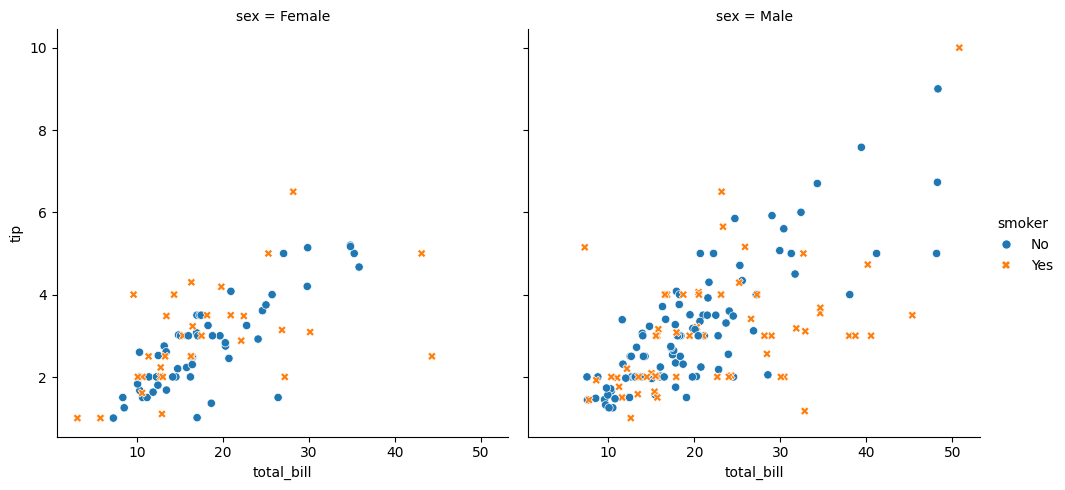

In [101]:
# по-моему так красивее:)
sns.relplot(
    data=df, x="total_bill", y="tip",
    col="sex", hue="smoker", style="smoker",
    kind="scatter"
)

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

### Входе работы было выявленно:
* Максимальный счет - 55.81;    
* Максимальный счет сделан был в субботу;   
* Максимальные чаевые сделанные мужчиной - 10;    
* Максимальные чаевые сделанные женщиной - 6.5;  
* Максимальные чаевые за все время - 10;    
* Максимальные чаевые были сделаны в субботу;    
___
* Минимальный счет - 3.07;    
* Минимальный счет сделан был сделан в субботу;    
* Минимальные чаевые сделанные мужчиной - 1;    
* Минимальные чаевые сделанные женщиной - 1;    
* Минимальные чаевые за все время - 1;    
* Минимальные чаевые были сделаны в пятницу и субботу;    
___
* Средний счет - 19.78;    
* Cредние чаевые за все время - 2.99;    
* Средние чаевые сделанные мужчиной - 3.08;     
* Средние чаевые сделанные женщиной - 2.83;    
* Максимальные средние чаевые сделаны в восскресенье - 3.25;    
* Минимальные средние чаевые сделаны в четверг - 2.77;
___ 



* Большее кол-во чаевых приходилось на ужин;    
* Большее кол-во чаевых приходилось на некурящих людей;    
* Большее кол-во чаевых давали мужчины, чем женщины;    
* Некурящих людей больше, чем курящих;    
* Среди курящих больше мужчин, чем женщин;    
* Самый нагруженный день с большей выручкой - суббота;
* Самый нагруженное время дня - ужин;    
* Самый ненагруженный день с меньшей выручкой - пятница;    
* Большее кол-во чаевых получено в субботу;    
* В четверг приходит большее людей на обед, чем на ужин;    
* Большее кол-во мужчин приходит на ужин, чем на обед.    

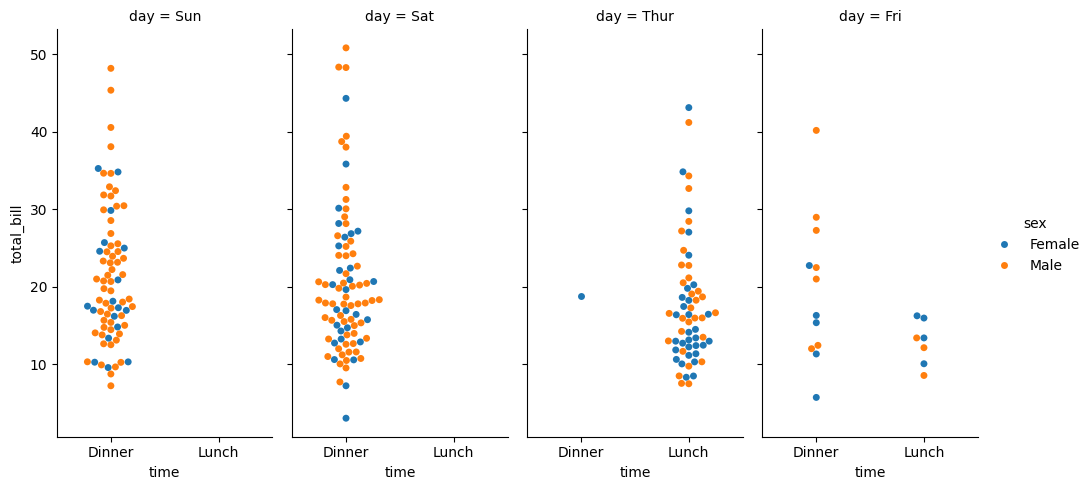

In [102]:
# доп график
sns.catplot(
    data=df, kind="swarm",
    x="time", y="total_bill", hue="sex", col="day",
    aspect=.5
)

In [103]:
df.groupby("sex")["tip"].max()

sex
Female     6.5
Male      10.0
Name: tip, dtype: float64

In [104]:
df.groupby("day")["total_bill"].max()

day
Fri     40.17
Sat     50.81
Sun     48.17
Thur    43.11
Name: total_bill, dtype: float64

In [105]:
df.groupby("day")["tip"].max()

day
Fri      4.73
Sat     10.00
Sun      6.50
Thur     6.70
Name: tip, dtype: float64

In [106]:
df.groupby("day")["size"].max()

day
Fri     4
Sat     5
Sun     6
Thur    6
Name: size, dtype: int64

In [107]:
df.groupby("day")["size"].count()

day
Fri     19
Sat     87
Sun     76
Thur    62
Name: size, dtype: int64

In [108]:
df.groupby("day")["tip"].count()

day
Fri     19
Sat     87
Sun     76
Thur    62
Name: tip, dtype: int64

In [109]:
df.groupby("sex")["day"].count()

sex
Female     87
Male      157
Name: day, dtype: int64

In [110]:
df.groupby("day")["sex"].count()

day
Fri     19
Sat     87
Sun     76
Thur    62
Name: sex, dtype: int64

In [111]:
df.groupby("sex")["tip"].min()

sex
Female    1.0
Male      1.0
Name: tip, dtype: float64

In [112]:
df.groupby("day")["total_bill"].min()

day
Fri     5.75
Sat     3.07
Sun     7.25
Thur    7.51
Name: total_bill, dtype: float64

In [113]:
df.groupby("day")["tip"].min()

day
Fri     1.00
Sat     1.00
Sun     1.01
Thur    1.25
Name: tip, dtype: float64

In [114]:
df.groupby("day")["size"].min()

day
Fri     1
Sat     1
Sun     2
Thur    1
Name: size, dtype: int64

In [115]:
df.groupby("sex")["tip"].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [116]:
df.groupby("day")["total_bill"].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [117]:
df.groupby("day")["tip"].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [118]:
df["total_bill"].mean()

19.78594262295082

In [119]:
df["tip"].mean()

2.99827868852459

In [143]:
df = df.replace({"smoker": {"Yes": 1, "No": 0}})

smoker = df.loc[(df["smoker"] == 1)]
smoker.groupby("day")["smoker"].count()

day
Fri     15
Sat     42
Sun     19
Thur    17
Name: smoker, dtype: int64

In [144]:
no_smoker = df.loc[(df["smoker"] == 0)]
no_smoker.groupby("day")["smoker"].count()

day
Fri      4
Sat     45
Sun     57
Thur    45
Name: smoker, dtype: int64

In [148]:
smoker.groupby("day")["tip"].max()

day
Fri      4.73
Sat     10.00
Sun      6.50
Thur     5.00
Name: tip, dtype: float64

In [150]:
no_smoker.groupby("day")["tip"].min()

day
Fri     1.50
Sat     1.00
Sun     1.01
Thur    1.25
Name: tip, dtype: float64

In [152]:
smoker.groupby("day")["tip"].mean()

day
Fri     2.714000
Sat     2.875476
Sun     3.516842
Thur    3.030000
Name: tip, dtype: float64

In [153]:
no_smoker.groupby("day")["tip"].mean()

day
Fri     2.812500
Sat     3.102889
Sun     3.167895
Thur    2.673778
Name: tip, dtype: float64

In [165]:
smoker.groupby("sex")["smoker"].count()

sex
Female    33
Male      60
Name: smoker, dtype: int64

In [166]:
no_smoker.groupby("sex")["smoker"].count()

sex
Female    54
Male      97
Name: smoker, dtype: int64